In [29]:
import pandas as pd
import numpy as np

import math

from sklearn.preprocessing import StandardScaler, scale

In [30]:
df = pd.read_csv('Datasets/absenteeism_processed.csv')

In [31]:
df.head(10)

,Transportation,Distance,Service,Age,Workload,Weight,Height,BMI,AbsentHours
0,289.0,36.0,13.0,33.0,239.554,90.0,172.0,30.0,4.0
1,118.0,13.0,18.0,50.0,239.554,98.0,178.0,31.0,0.0
2,179.0,51.0,18.0,38.0,239.554,89.0,170.0,31.0,2.0
3,279.0,5.0,14.0,39.0,239.554,68.0,168.0,24.0,4.0
4,289.0,36.0,13.0,33.0,239.554,90.0,172.0,30.0,2.0
5,179.0,51.0,18.0,38.0,239.554,89.0,170.0,31.0,2.0
6,361.0,52.0,3.0,28.0,239.554,80.0,172.0,27.0,8.0
7,260.0,50.0,11.0,36.0,239.554,65.0,168.0,23.0,4.0
8,155.0,12.0,14.0,34.0,239.554,95.0,196.0,25.0,40.0
9,235.0,11.0,14.0,37.0,239.554,88.0,172.0,29.0,8.0


In [32]:
df.describe()

,Transportation,Distance,Service,Age,Workload,Weight,Height,BMI,AbsentHours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,221.329730,29.631081,12.554054,36.450000,271.490235,79.035135,172.114865,26.677027,6.924324
std,66.952223,14.836788,4.384873,6.478772,39.058116,12.883211,6.034995,4.285452,13.330998
min,118.000000,5.000000,1.000000,27.000000,205.917000,56.000000,163.000000,19.000000,0.000000
25%,179.000000,16.000000,9.000000,31.000000,244.387000,69.000000,169.000000,24.000000,2.000000
50%,225.000000,26.000000,13.000000,37.000000,264.249000,83.000000,170.000000,25.000000,3.000000
75%,260.000000,50.000000,16.000000,40.000000,294.217000,89.000000,172.000000,31.000000,8.000000
max,388.000000,52.000000,29.000000,58.000000,378.884000,108.000000,196.000000,38.000000,120.000000


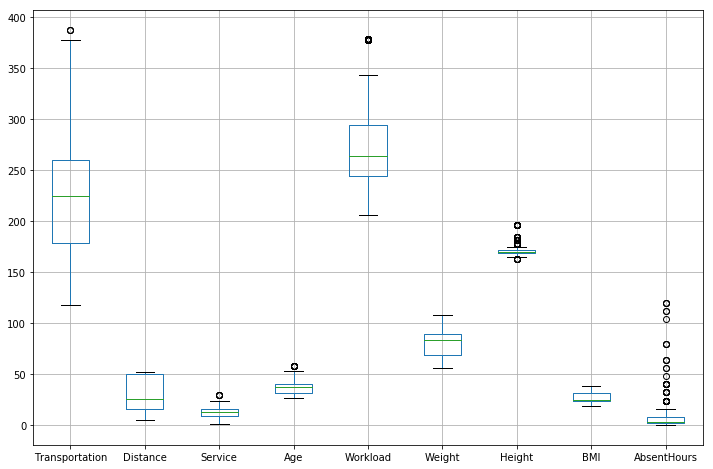

In [33]:
df.boxplot(figsize=(12, 8))

In [34]:
scaled_df = pd.DataFrame()

scaled_df['Transportation'] = scale(df['Transportation'])
scaled_df['Distance'] = scale(df['Distance'])
scaled_df['AbsentHours'] = scale(df['AbsentHours'])

In [35]:
scaled_df.describe()

,Transportation,Distance,AbsentHours
count,7.400000e+02,7.400000e+02,7.400000e+02
mean,6.601326e-17,-5.911187e-17,9.751959e-17
std,1.000676e+00,1.000676e+00,1.000676e+00
min,-1.544379e+00,-1.661258e+00,-5.197666e-01
25%,-6.326655e-01,-9.193567e-01,-3.696389e-01
50%,5.485632e-02,-2.449005e-01,-2.945750e-01
75%,5.779707e-01,1.373794e+00,8.074438e-02
max,2.491075e+00,1.508686e+00,8.487898e+00


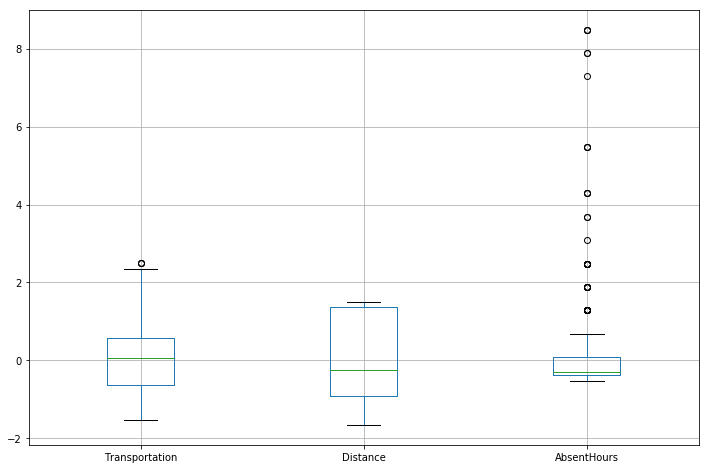

In [36]:
scaled_df.boxplot(figsize=(12, 8))

In [37]:
scaled_array = scale(df, copy=True, with_mean=True, with_std=True)

In [38]:
type(scaled_array)

numpy.ndarray

In [39]:
scaled_array.shape

(740, 9)

In [40]:
scaled_df = pd.DataFrame(scale(df), columns=df.columns)

In [41]:
scaled_df.describe()

,Transportation,Distance,Service,Age,Workload,Weight,Height,BMI,AbsentHours
count,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02
mean,6.601326e-17,-5.911187e-17,-3.660735e-17,-4.626929e-16,1.866148e-15,2.794311e-17,-1.015329e-15,-1.215244e-16,9.751959e-17
std,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00
min,-1.544379e+00,-1.661258e+00,-2.636762e+00,-1.459596e+00,-1.679999e+00,-1.789206e+00,-1.511357e+00,-1.792627e+00,-5.197666e-01
25%,-6.326655e-01,-9.193567e-01,-8.110742e-01,-8.417777e-01,-6.943900e-01,-7.794581e-01,-5.164829e-01,-6.251003e-01,-3.696389e-01
50%,5.485632e-02,-2.449005e-01,1.017698e-01,8.495004e-02,-1.855218e-01,3.079626e-01,-3.506706e-01,-3.915949e-01,-2.945750e-01
75%,5.779707e-01,1.373794e+00,7.864028e-01,5.483139e-01,5.822640e-01,7.740000e-01,-1.904601e-02,1.009438e+00,8.074438e-02
max,2.491075e+00,1.508686e+00,3.753146e+00,3.328497e+00,2.751449e+00,2.249785e+00,3.960449e+00,2.643976e+00,8.487898e+00


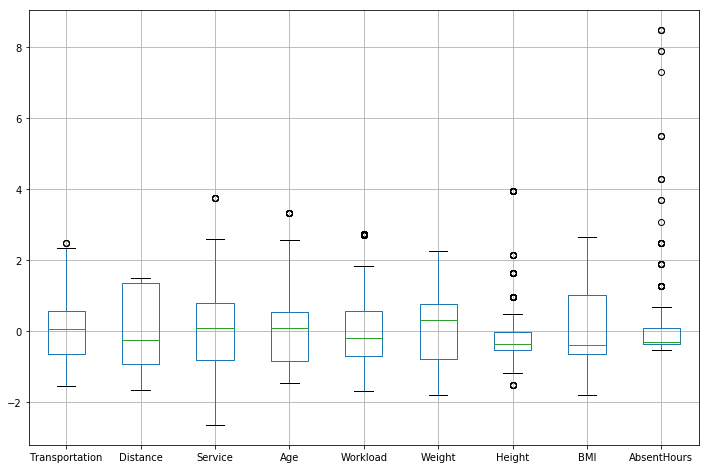

In [42]:
scaled_df.boxplot(figsize=(12, 8))

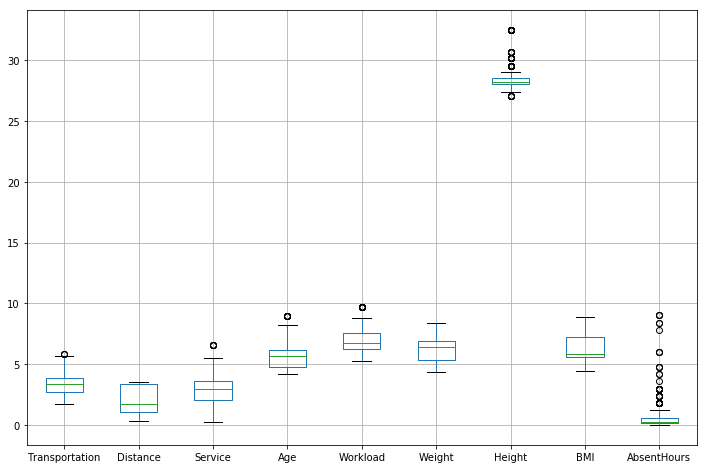

In [43]:
scaled_df = pd.DataFrame(scale(df, with_mean=False), columns=df.columns)

scaled_df.boxplot(figsize=(12, 8))

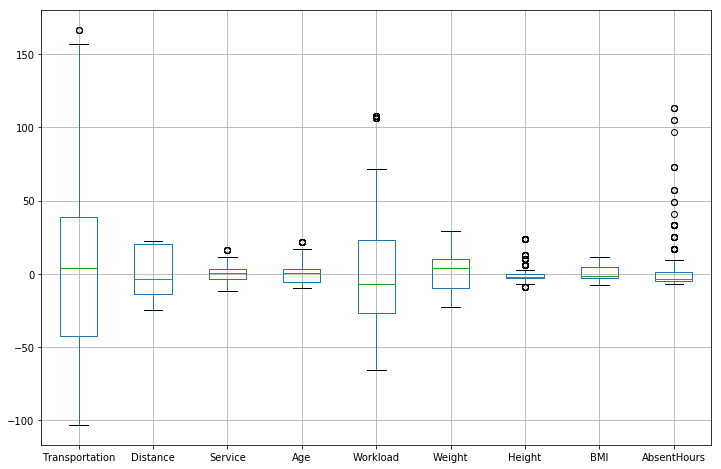

In [44]:
scaled_df = pd.DataFrame(scale(df, with_std=False), columns=df.columns)

scaled_df.boxplot(figsize=(12, 8))

In [45]:
std_scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

std_scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [46]:
std_scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [47]:
scaled_array = std_scaler.transform(df)

In [48]:
scaled_array.shape

(740, 9)

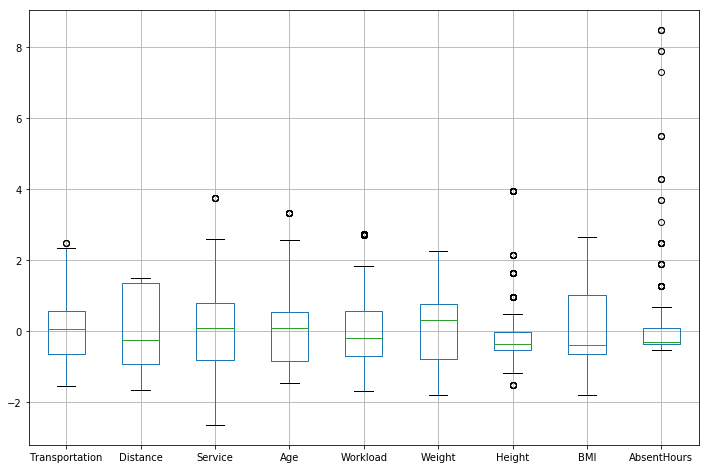

In [49]:
scaled_df = pd.DataFrame(scaled_array, columns=df.columns)

scaled_df.boxplot(figsize=(12, 8))

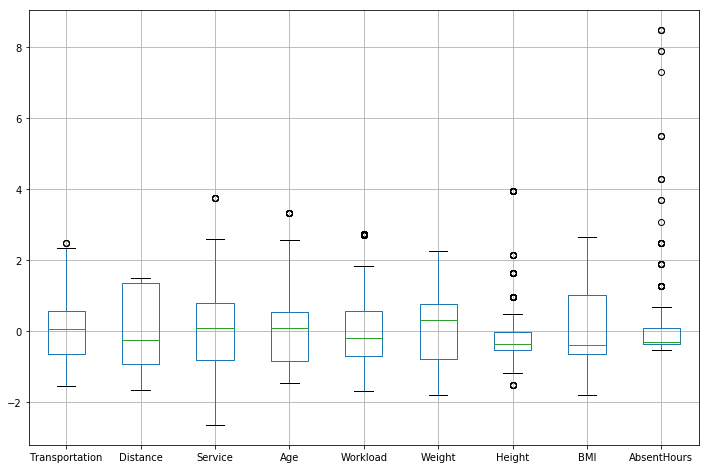

In [50]:
std_scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

scaled_array = std_scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_array, columns=df.columns)

scaled_df.boxplot(figsize=(12, 8))

In [57]:
std_scaler.mean_

array([221.32972973,  29.63108108,  12.55405405,  36.45      ,
       271.49023514,  79.03513514, 172.11486486,  26.67702703,
         6.92432432])

In [58]:
std_scaler.var_

array([4476.54262966,  219.83281775,   19.20113221,   41.91777027,
       1523.47490444,  165.75281958,   36.3719412 ,   18.34028305,
        177.47535427])

In [61]:
std_scaler.scale_

array([66.90696996, 14.82676019,  4.38190965,  6.47439343, 39.03171665,
       12.87450269,  6.03091545,  4.28255567, 13.32198762])

In [60]:
std_scaler.n_samples_seen_

740

### Bessel's correction

In [51]:
n = df.shape[0]

bessels_correction_adjustment = math.sqrt((n-1) / n)
bessels_correction_adjustment

0.9993240959011489

In [52]:
scaled_df['Distance_Bessels'] = (scaled_df['Distance'] - scaled_df['Distance'].mean()) /\
        (scaled_df['Distance'].std() * bessels_correction_adjustment)

In [53]:
scaled_df[['Distance', 'Distance_Bessels']].head(10)

,Distance,Distance_Bessels
0,0.429556,0.429556
1,-1.121694,-1.121694
2,1.441240,1.441240
3,-1.661258,-1.661258
4,0.429556,0.429556
5,1.441240,1.441240
6,1.508686,1.508686
7,1.373794,1.373794
8,-1.189139,-1.189139
9,-1.256585,-1.256585
